![Avatar foto de Flávio Coutinho](https://fegemo.github.io/cefet-front-end/images/flavio-avatar.jpg)
# TP1 - Detecção de Exoplanetas


<dl style="margin-top: 1.5em">
    <dt>Aluno</dt><dd>Flávio Coutinho</dd>
    <dt>Turma</dt><dd>Aprendizado de Máquina, UFMG, 01/21</dd>
    <dt>Objetivo</dt><dd>Utilizar e comparar diferentes métodos de classificação para detectar exoplanetas a partir de dados do Kepler.</dd>
</dl>

Conteúdo deste _notebook_:
- [Descrição dos dados](#Descrição-dos-dados)
- [Preparação dos dados](#Preparação-dos-dados)
- [Métodos de classificação](#Métodos-de-classificação)
   - [Naive Bayes](#Naive-Bayes)
   - [Decision Tree](#Decision-Tree)
   - [SVM](#SVM)
   - [k-NN](#k-NN)
   - [Random Forest](#Random-Forest)
   - [Gradient Tree Boosting](#Gradient-Tree-Boosting)
- [Comparação dos métodos](#Comparação-dos-métodos)


In [1]:
"""
Inicialização e importação
"""
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':300})

import numpy as np
import pandas as pd

In [49]:
"""
Define uma folha de estilos pro notebook
"""
from IPython.core.display import HTML
def css_styling():
    styles = "<style>" + open("./estilos.css", "r").read() + "</style>"
    return HTML(styles)
css_styling()

## Descrição dos dados

O arquivo `koi_data.csv` possui 1.490KB e contém 43 colunas e 5202 linhas de dados (+1 de cabeçalho). Uma amostra dos dados:

In [2]:
df_original = pd.read_csv("koi_data.csv", header=0)
df_original.head()

,kepoi_name,koi_disposition,koi_period,koi_impact,koi_duration,koi_depth,koi_ror,koi_srho,koi_prad,koi_sma,...,koi_fwm_srao,koi_fwm_sdeco,koi_fwm_prao,koi_fwm_pdeco,koi_dicco_mra,koi_dicco_mdec,koi_dicco_msky,koi_dikco_mra,koi_dikco_mdec,koi_dikco_msky
0,K00752.01,CONFIRMED,9.48804,0.146,2.95750,615.8,0.02234,3.20796,2.26,0.0853,...,0.430,0.940,-0.00020,-0.00055,-0.010,0.200,0.200,0.080,0.310,0.320
1,K00752.02,CONFIRMED,54.41838,0.586,4.50700,874.8,0.02795,3.02368,2.83,0.2734,...,-0.630,1.230,0.00066,-0.00105,0.390,0.000,0.390,0.490,0.120,0.500
2,K00754.01,FALSE POSITIVE,1.73695,1.276,2.40641,8079.2,0.38739,0.22080,33.46,0.0267,...,-0.111,0.002,0.00302,-0.00142,-0.249,0.147,0.289,-0.257,0.099,0.276
3,K00755.01,CONFIRMED,2.52559,0.701,1.65450,603.3,0.02406,1.98635,2.75,0.0374,...,-0.010,0.230,0.00008,-0.00007,0.030,-0.090,0.100,0.070,0.020,0.070
4,K00114.01,FALSE POSITIVE,7.36179,1.169,5.02200,233.7,0.18339,0.00485,39.21,0.0820,...,-13.450,24.090,0.00303,-0.00555,-4.506,7.710,8.930,-4.537,7.713,8.948


In [3]:
print("Dimensões: ", df_original.shape)

Dimensões:  (5202, 43)


## Preparação dos dados

Os dados carregados são primeiramente preparados e normalizados para, então, serem submetidos aos estimadores. Preparação:

1. Remover colunas desnecessárias para classificadores (`kepoi_name`)
1. Atribuir valor numérico para coluna de rótulos $y$ (`koi_disposition`)
1. Embaralha as linhas
1. Converte o `DataFrame` para `np.ndarray`
1. Divide o `ndarray` nos vetores `X` (todas as _features_) e `y` (apenas rótulos)
1. Padroniza as _features_ para terem média $0$ e variância $1$


In [4]:
# 1. remove coluna
df = df_original.drop(labels="kepoi_name", axis=1)

# 2. valor numérico para rótulo
df["koi_disposition"] = df["koi_disposition"].map({
    "CONFIRMED": 1,
    "FALSE POSITIVE": 0
})

# 3. embaralha
# df = df.sample(frac=1)

# 4. DataFrame >> ndarray
# 5. X, y
dados = df.to_numpy()
y = dados[:, 0]
X = dados[:, 1:]
# print(X)

# 6. padroniza todas as features (X)
from sklearn.preprocessing import StandardScaler
padronizador = StandardScaler().fit(X)
X = padronizador.transform(X)

## Métodos de classificação

In [5]:
"""
Importações de utilitários para divisão dos dados e medição
"""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Naive Bayes

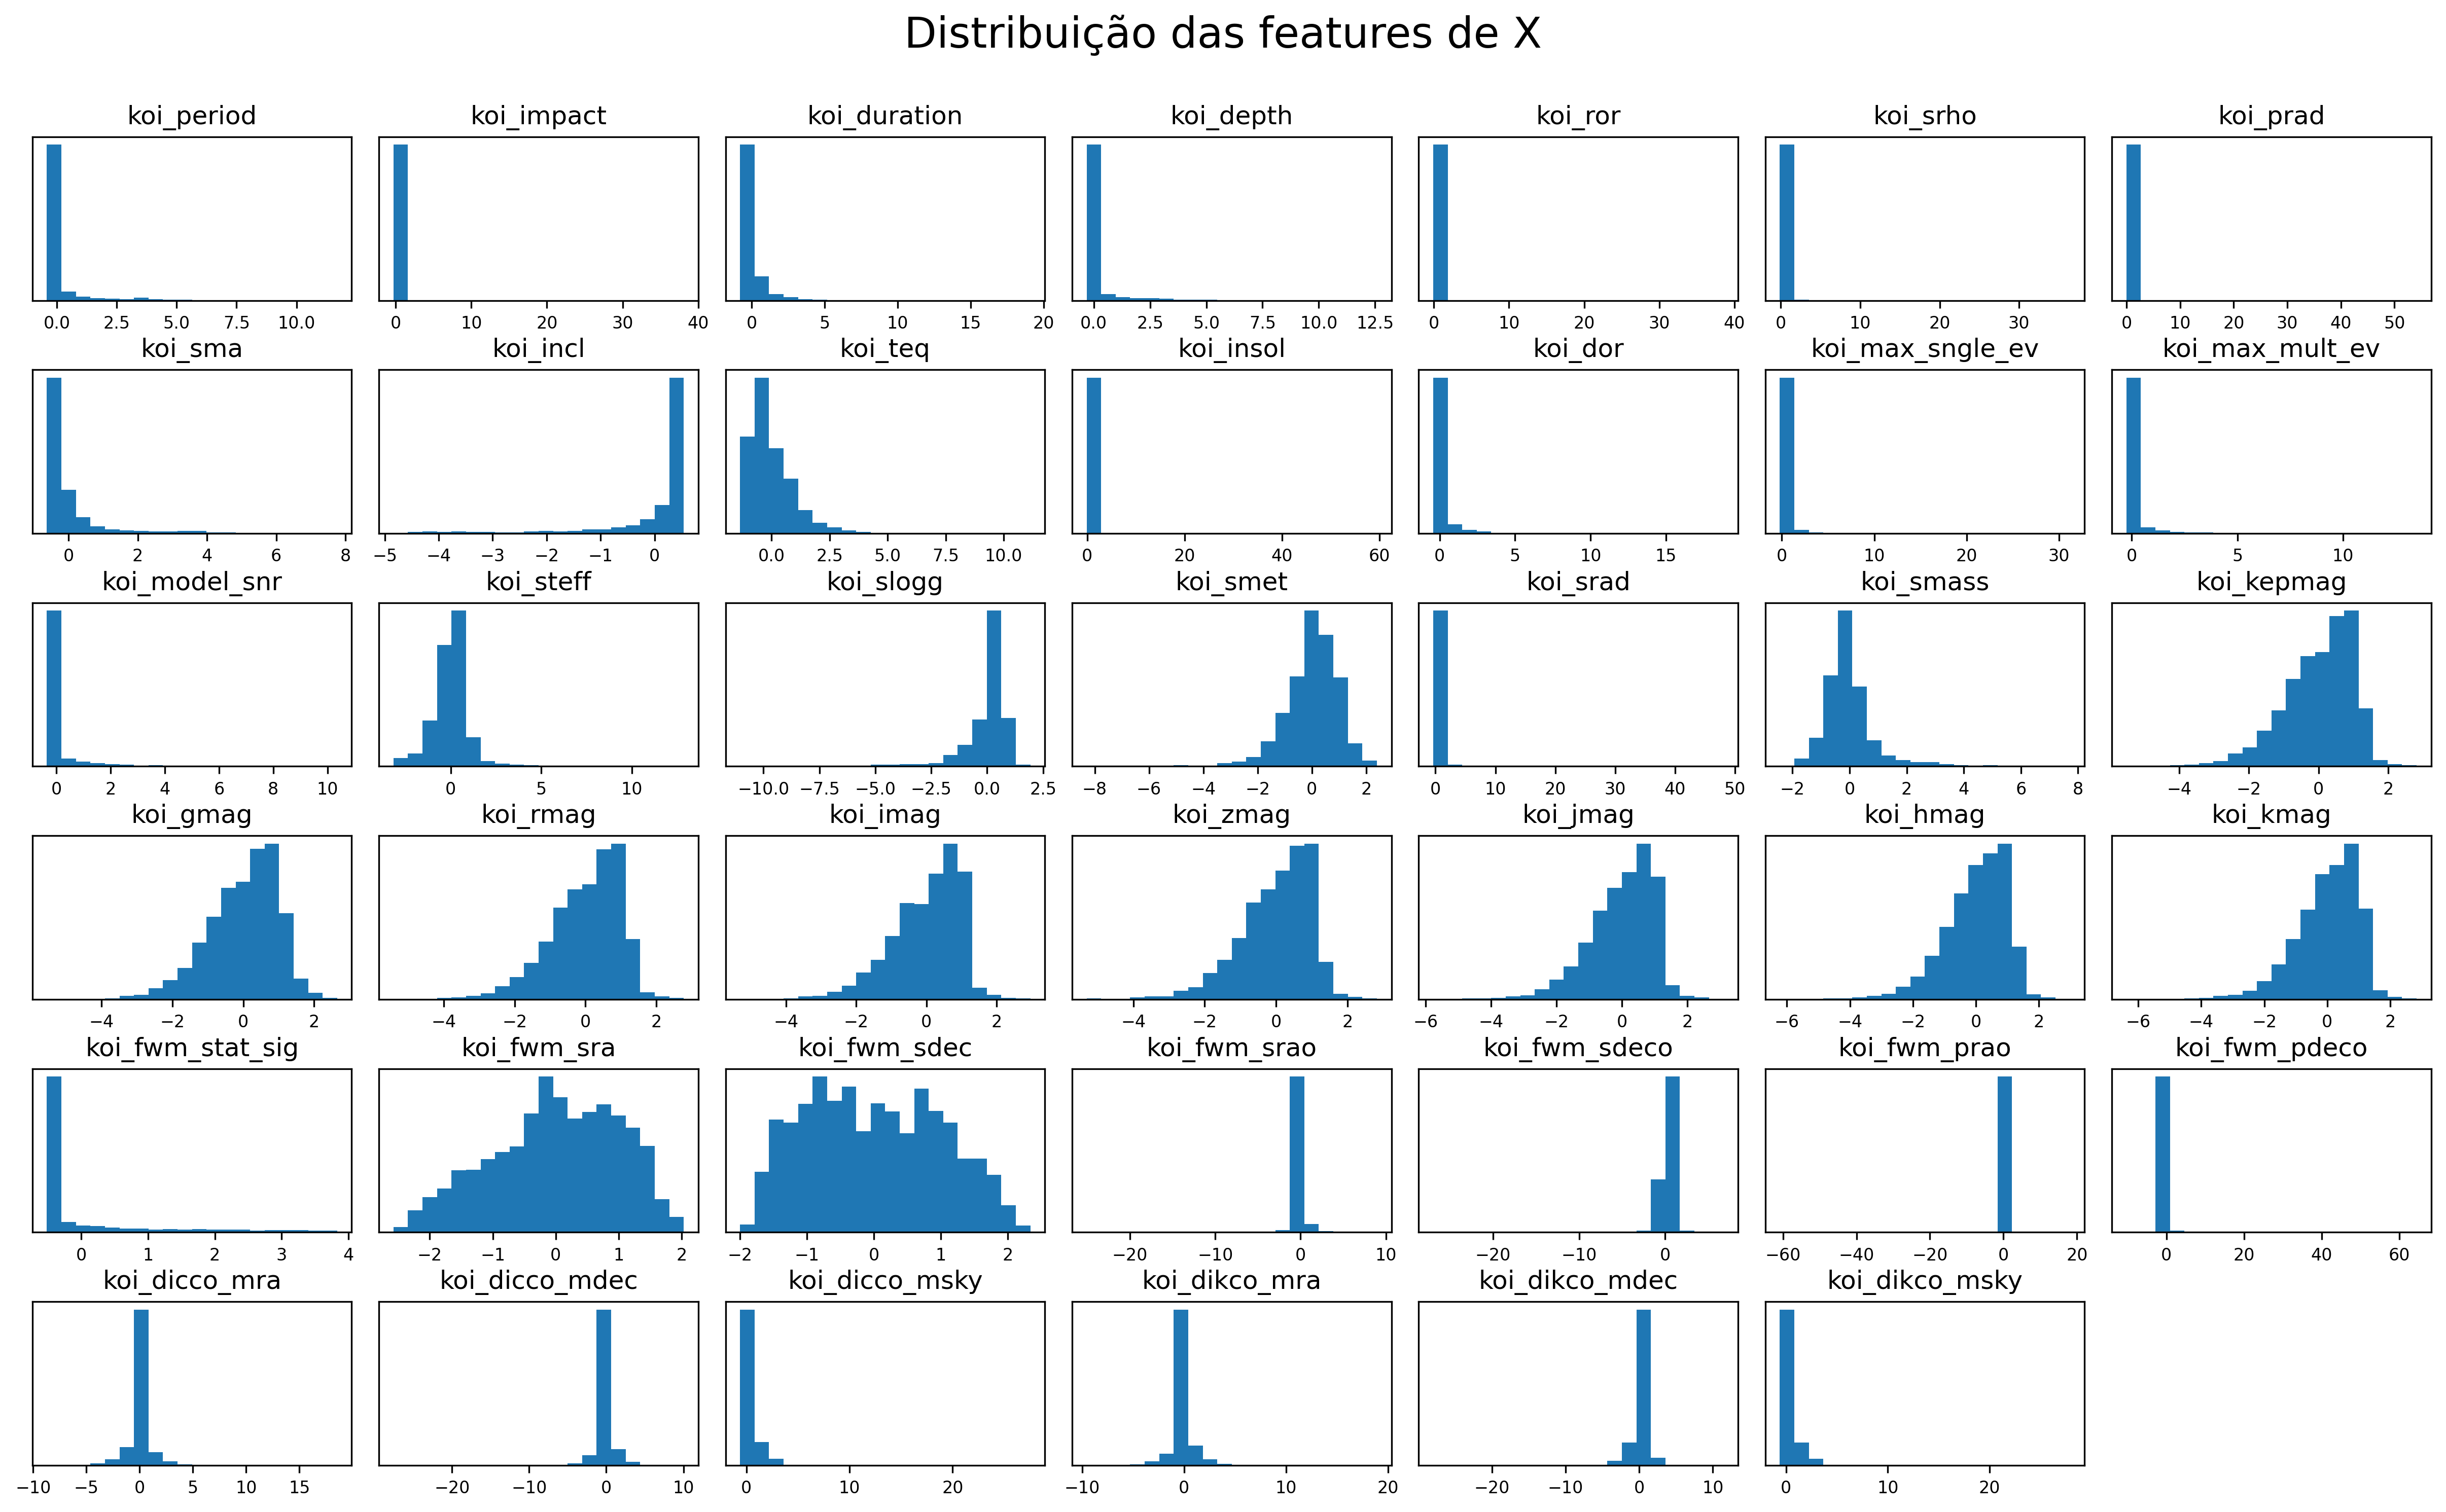

In [44]:
# Estudando a distribuição das features para escolher o algoritmo
plt.rcParams["figure.figsize"] = [16,10]
features = X.shape[1]
linhas = 6
colunas = 7



fig, axs = plt.subplots(linhas, colunas)
fig.suptitle('Distribuição das features de X', fontsize=20)
plt.rc('axes', titlesize=12)    # fontsize of the axes title
plt.rc('xtick', labelsize=8)    # fontsize of the tick labels
plt.rc('ytick', labelsize=4)    # fontsize of the tick labels
plt.rc('font', size=4)          # controls default text sizes

for i in range(linhas):
    for j in range(colunas):
        if i*colunas + j < features:
            axs[i, j].hist(X[:, i*colunas + j], bins=20)
            axs[i, j].set_title(df.columns[i*colunas + j + 1])
            axs[i, j].set_yticks([])
            
        else:
            axs[i, j].axis('off')

fig.tight_layout()
plt.subplots_adjust(top=0.9)

Como as distribuições parecem normais, será usado `GaussianNB`.

In [11]:
from sklearn.naive_bayes import GaussianNB

def test_naive_bayes(X_train, y_train, X_test, y_test):
    estimator = GaussianNB()
    estimator.fit(X_train, y_train)
    
    return accuracy_score(estimator.predict(X_test), y_test)

nb_accuracy = test_naive_bayes(X_train, y_train, X_test, y_test)
print("Acurácia de *Naive Bayes*: ", nb_accuracy)


Acurácia de *Naive Bayes*:  0.9077632590315142


### Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

def test_decision_tree(X_train, y_train, X_test, y_test, max_tree_depth=[None]):
    accuracy = {}
    best_accuracy = float('-inf')
    best_estimator = None
    for n in max_tree_depth:
        estimator = DecisionTreeClassifier(max_depth=n)
        estimator.fit(X_train, y_train)
        accuracy[n] = accuracy_score(estimator.predict(X_test), y_test)
    
        if accuracy[n] > best_accuracy:
            best_accuracy = accuracy[n]
            best_estimator = estimator
    
    return accuracy, best_estimator

dt_accuracy, best_estimator = test_decision_tree(X_train, y_train, X_test, y_test, [1, 2, 4, 8, 16, 32, 64, 128, None])
print("Acurácia de *Decision Tree* variando profundidade máxima: ", dt_accuracy)


# plot_tree(best_estimator)

Acurácia de *Decision Tree*:  {1: 0.7717140661029976, 2: 0.8455034588777863, 4: 0.9431206764027671, 8: 0.9500384319754035, 16: 0.9485011529592621, 32: 0.9400461183704842, 64: 0.9446579554189085, 128: 0.9469638739431206, None: 0.9423520368946964}


### SVM

In [39]:
from sklearn.svm import SVC

def test_svm(X_train, y_train, X_test, y_test, kernel=["rbf"], C=1):
    accuracy = {}
    for k in kernel:
        estimator = SVC(kernel=k, C=C)
        estimator.fit(X_train, y_train)
        accuracy[k] = accuracy_score(estimator.predict(X_test), y_test)
        
    return accuracy

svm_accuracy = test_svm(X_train, y_train, X_test, y_test, ["linear", "sigmoid", "poly", "rbf"], 700)
print("Acurácia de *SVM* variando tipos de kernel: ", svm_accuracy)


Acurácia de *SVM*:  {'linear': 0.9600307455803229, 'sigmoid': 0.8055342044581092, 'poly': 0.9208301306687163, 'rbf': 0.9385088393543428}


### k-NN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

def test_knn(X_train, y_train, X_test, y_test, neighbors=[5]):
    accuracy = {}
    best_accuracy = float('-inf')
    best_estimator = None
    for n in neighbors:
        estimator = KNeighborsClassifier(n_neighbors=n)
        estimator.fit(X_train, y_train)
        accuracy[n] = accuracy_score(estimator.predict(X_test), y_test)
    
        if accuracy[n] > best_accuracy:
            best_accuracy = accuracy[n]
            best_estimator = estimator
    
    return accuracy, best_estimator

knn_accuracy, best_estimator = test_knn(X_train, y_train, X_test, y_test, [1, 2, 4, 8, 16, 32, 64, 128])
print("Acurácia de *KNN* variando k: ", knn_accuracy)

Acurácia de *KNN*:  {1: 0.8847040737893928, 2: 0.8900845503458877, 4: 0.8900845503458877, 8: 0.8862413528055342, 16: 0.8724058416602614, 32: 0.8585703305149884, 64: 0.8431975403535742, 128: 0.8178324365872406}


### Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

def test_random_forest(X_train, y_train, X_test, y_test, number_of_trees=[100]):
    accuracy = {}
    for n in number_of_trees:        
        estimator = RandomForestClassifier(random_state=0, n_estimators=n)
        estimator.fit(X_train, y_train)
        accuracy[n] = accuracy_score(estimator.predict(X_test), y_test)
        
    return accuracy

rf_accuracy = test_random_forest(X_train, y_train, X_test, y_test, [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
print("Acurácia de *Random Forest* variando quantidade de árvores: ", rf_accuracy)


Acurácia de *Random Forest* variando quantidade de árvores:  {2: 0.9438893159108378, 4: 0.9538816295157571, 8: 0.9638739431206764, 16: 0.9638739431206764, 32: 0.9692544196771714, 64: 0.9661798616448886, 128: 0.96771714066103, 256: 0.9661798616448886, 512: 0.9669485011529593, 1024: 0.9669485011529593}


### Gradient Tree Boosting

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

def test_gradient_boosting(X_train, y_train, X_test, y_test, number_of_iterations=[100]):
    accuracy = {}
    for n in number_of_iterations:        
        estimator = GradientBoostingClassifier(random_state=0, n_estimators=n)
        estimator.fit(X_train, y_train)
        accuracy[n] = accuracy_score(estimator.predict(X_test), y_test)
        
    return accuracy

gb_accuracy = test_gradient_boosting(X_train, y_train, X_test, y_test, [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])
print("Acurácia de *Gradient Boosting* variando número de iterações: ", gb_accuracy)

Acurácia de *Gradient Boosting* variando número de iterações:  {2: 0.8808608762490392, 4: 0.940814757878555, 8: 0.9454265949269792, 16: 0.9523443504996156, 32: 0.962336664104535, 64: 0.9654112221368178, 128: 0.9723289777094543, 256: 0.973097617217525, 512: 0.9746348962336664, 1024: 0.9746348962336664}


## Comparação dos métodos


Mostrar curvas ROC e as medidas de acurácia e revocação.